
# 🌾 Week 3 — SPy 高光谱数据分析入门（Bilingual 教学模板）  
**主题 Theme:** 使用 Spectral Python（SPy）进行伪彩色显示与 PCA 降维  
**目标 Goals:**  
1. 掌握 SPy 的基本使用方法  
2. 学习如何用 PCA 将高光谱数据降维为 3 通道可视化  
3. 绘制伪 RGB 图与 PCA 三维散点图  
---



## 🧩 环境配置 Environment Setup


In [2]:

# 安装 Spectral Python（若未安装）
# !pip install spectral numpy matplotlib scikit-learn
import spectral as spy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("SPy version:", spy.__version__)


SPy version: 0.24



## 📂 数据加载（Load Dataset）  
使用与 Week1 相同的 Indian Pines 数据集。


In [3]:

from scipy.io import loadmat

data = loadmat('../../data/Indian_pines_corrected.mat')['indian_pines_corrected']
print("Data shape:", data.shape)  # (145, 145, 200)


Data shape: (145, 145, 200)



## 🎨 Step 1. 伪彩色图显示 False Color Visualization


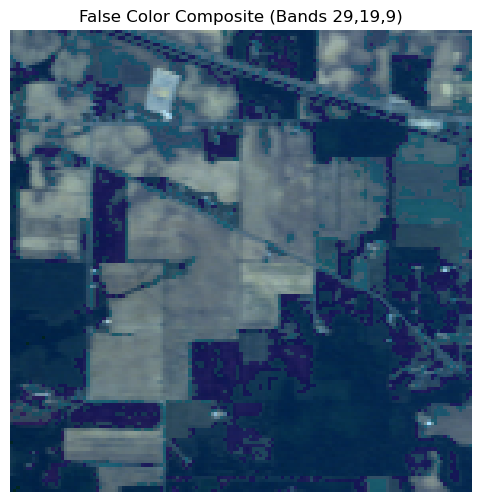

In [3]:

rgb_bands = (29, 19, 9)
rgb_img = data[:, :, list(rgb_bands)]

plt.figure(figsize=(6,6))
plt.imshow((rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min()))
plt.title("False Color Composite (Bands 29,19,9)")
plt.axis("off")
plt.show()



## 📊 Step 2. PCA 降维到 3 维（PCA Reduction to 3D）

**PCA** (Principal Component Analysis) 是一种常用的降维技术，能将高维数据映射到低维空间，同时尽可能保留数据的方差。

PCA 详解请参考：
https://www.bilibili.com/video/BV1E5411E71z/?spm_id_from=333.337.search-card.all.click&vd_source=03813509577b8c223677129c08febf19

线性代数
https://www.bilibili.com/video/BV1ys411472E/?spm_id_from=333.788.top_right_bar_window_custom_collection.content.click&vd_source=019c7fa61d58b2919efaeb019d3ae129

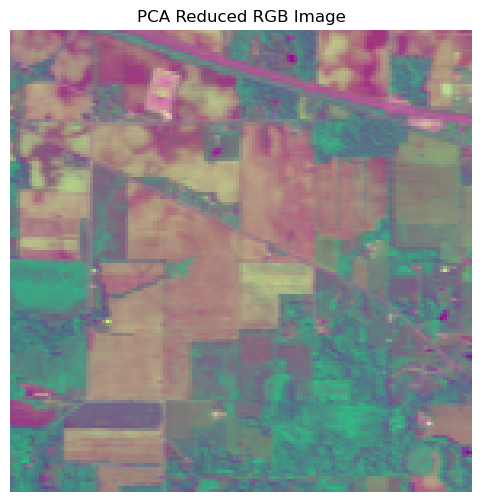

In [4]:

h, w, b = data.shape
# print(h, w, b)
# print(data[0])
X = data.reshape(-1, b)
# print(X.shape)
# print(X[0])

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# print(X_pca.shape)
pca_img = X_pca.reshape(h, w, 3)

plt.figure(figsize=(6,6))
plt.imshow((pca_img - pca_img.min()) / (pca_img.max() - pca_img.min()))
plt.title("PCA Reduced RGB Image")
plt.axis("off")
plt.show()



## 🌈 Step 3. 绘制 PCA 三维散点图 (3D Scatter of PCA)


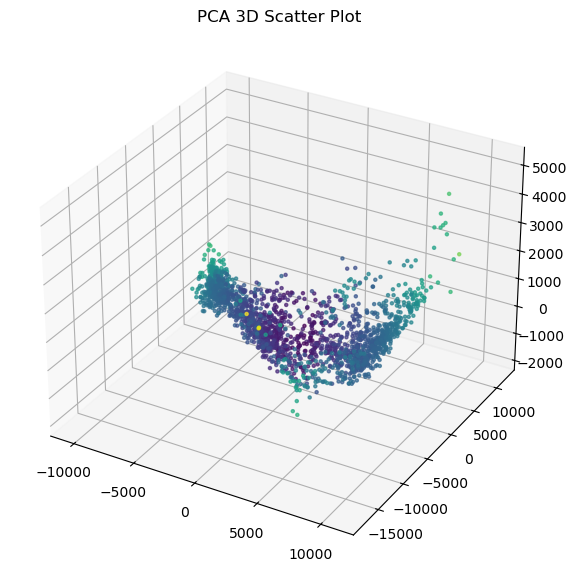

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

idx = np.random.choice(X_pca.shape[0], 2000, replace=False)
sample = X_pca[idx]

# 归一化颜色值到 0-1 范围，仅对每个点的模长进行归一化
norm = colors.Normalize(vmin=0, vmax=np.linalg.norm(sample, axis=1).max())
normalized_colors = norm(np.linalg.norm(sample, axis=1))

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample[:,0], sample[:,1], sample[:,2], s=5, c=normalized_colors, alpha=0.7)
ax.set_title("PCA 3D Scatter Plot")
plt.show()


## ✅ 任务练习（Exercises）  
1. 修改伪彩色波段组合（例如 50,30,10）并观察差异。  
2. 尝试使用 `n_components=5`，查看前 3 主成分解释方差。  
3. 选取不同地物（如农田 vs 道路）的 PCA 分布差异。  

---
**下一周（Week 4）预告:**  
➡️ 引入高光谱解混的数学模型与线性混合模型（Linear Mixing Model, LMM）。


In [13]:
import numpy as np
a = np.arange(6)
print(a)
b = a.reshape((2, 3))
print(np.ravel(b))

a = np.arange(12).reshape((-1, 3, 2))
print(a)

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [5]:
# python
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 假设 X 形状为 (n_samples, n_features)
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

print("explained variance ratio:", pca.explained_variance_ratio_)
print("cumulative variance ratio:", np.cumsum(pca.explained_variance_ratio_))

# 重构与误差（衡量信息损失）
X_rec = pca.inverse_transform(X_pca)
mse = np.mean((X_std - X_rec) ** 2)
print("reconstruction MSE:", mse)

explained variance ratio: [0.6861814  0.19194106 0.0256119 ]
cumulative variance ratio: [0.6861814  0.87812246 0.90373436]
reconstruction MSE: 0.09626564016209295
